In [139]:
from yahoo_fin import options
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [196]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', 1000)  # Increase display width to prevent wrapping
pd.set_option('display.max_colwidth', None)  # Show full content of each column

stock='NVDA'
prices_data = yf.download(stock,start='2024-05-01')['Adj Close'][-1]

chain = options.get_options_chain(stock,'05/24/2024')

[*********************100%%**********************]  1 of 1 completed


In [203]:
calls = chain['calls']
puts = chain['puts']

calls=calls[(calls['Strike']<prices_data+400) & (calls['Strike']>=prices_data)]
puts=puts[(puts['Strike']<=prices_data) & (puts['Strike']>prices_data-400)]
calls=calls[(calls['Strike']>prices_data)]
puts=puts[(puts['Strike']<prices_data)]
calls['Implied Volatility'] = calls['Implied Volatility'].astype(str).str.replace(',', '').str.rstrip('%').astype(float)
puts['Implied Volatility'] = puts['Implied Volatility'].astype(str).str.replace(',', '').str.rstrip('%').astype(float)


In [204]:
calls['Implied Volatility']=calls['Implied Volatility'].replace(0,np.nan)
calls['Implied Volatility']=calls['Implied Volatility'].interpolate(method='linear', limit_direction='forward', axis=0)
puts['Implied Volatility']=puts['Implied Volatility'].replace(0,np.nan)
puts['Implied Volatility']=puts['Implied Volatility'].interpolate(method='linear', limit_direction='forward', axis=0)

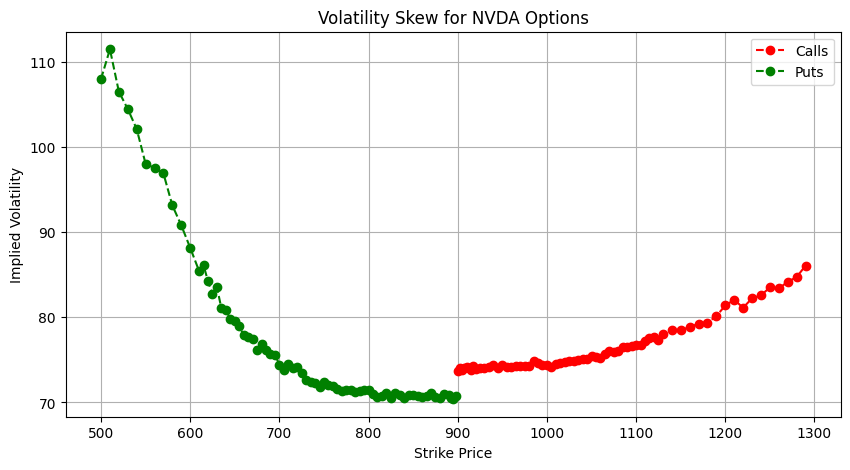

In [205]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting Calls and Puts Implied Volatility vs. Strike Price
ax.plot(calls['Strike'], calls['Implied Volatility'], label='Calls', color='red', linestyle='--', marker='o')
ax.plot(puts['Strike'], puts['Implied Volatility'], label='Puts', color='green', linestyle='--', marker='o')

# Setting labels and chart title
ax.set_xlabel('Strike Price')
ax.set_ylabel('Implied Volatility')
ax.set_title(f'Volatility Skew for {stock} Options')
ax.legend()

# # Customizing the y-ticks to show every 5th value
# max_iv = max(calls['Implied Volatility'].max(), puts['Implied Volatility'].max())
# min_iv = min(calls['Implied Volatility'].min(), puts['Implied Volatility'].min())
# yticks = np.arange(min_iv, max_iv, (max_iv - min_iv) / 5)
# ax.set_yticks(yticks)

# Adding grid for better readability
ax.grid(True)

# Display the plot
plt.show()